<a href="https://colab.research.google.com/github/jagvgithub/Classification_Regression_models/blob/main/ModeloPrepagosVehiculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# paquetes necesarios
!pip install pycaret # Modelos ML
!pip install gender_guesser # Estimación de género

# Librerias necearias
from google.colab import files  # carga de datos
import pandas as pd # manipulación de bases de datos
import numpy as np # manipulación de bases de datos
import matplotlib.pyplot as plt # Visualizaciones
import keyword # Listado de palabras reservadas
from wordcloud import WordCloud # Nube de palabras
import gender_guesser.detector as gender # Estimación de género a partir del primer y segundo nombre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8

In [25]:
from google.colab import files
import pandas as pd
# Cargar el archivo CSV
uploaded = files.upload()

Saving modeloprepagosvehiculo_limpio22.xlsx to modeloprepagosvehiculo_limpio22.xlsx


In [26]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/modeloprepagosvehiculo_limpio22.xlsx'

# Leer el archivo xlsx usando pandas
datos = pd.read_excel(ruta_archivo)
datos=pd.DataFrame(datos)

In [27]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])
# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes.head(60))

obligacion                 int64
valor_desembolsado         int64
valor_cuota                int64
cuotas_restantes           int64
DIPLAZO                    int64
DIMODEL                    int64
Tasa                     float64
1_Acierta                float64
2_Acierta                float64
3_Acierta                float64
4_Acierta                float64
5_Acierta                float64
1_deudaFA                float64
2_deudaFA                float64
3_deudaFA                float64
4_deudaFA                float64
5_deudaFA                float64
1_deudaSECTOR            float64
2_deudaSECTOR            float64
3_deudaSECTOR            float64
4_deudaSECTOR            float64
5_deudaSECTOR            float64
1_ingresos               float64
2_ingresos               float64
3_ingresos               float64
4_ingresos               float64
5_ingresos               float64
1_cantidadpagos          float64
2_cantidadpagos          float64
3_cantidadpagos          float64
4_cantidad

In [28]:
print(datos.shape)

(31129, 78)


In [29]:
proporcion_datos_faltantes = (round(datos.isnull().sum() / len(datos),2) * 100).sort_values(ascending=False)
print(proporcion_datos_faltantes.head(50))

v1_deudaFA               59.0
name2                    27.0
estadocivil              17.0
v2_deudaFA                8.0
5_cantidadpagos           6.0
v1_deudaSECTOR            4.0
DITIPO                    3.0
4_cantidadpagos           3.0
Municipio                 1.0
name1                     1.0
3_cantidadpagos           1.0
2_cantidadpagos           1.0
v2_deudaSECTOR            1.0
DescripcionSucursal       1.0
v3_deudaFA                1.0
negativo_deudaFA          0.0
v4_deudaFA                0.0
v3_acierta                0.0
v2_acierta                0.0
neutro_acierta            0.0
negativo_acierta          0.0
positivo_deudaFA          0.0
v4_acierta                0.0
positivo_acierta          0.0
v3_deudaSECTOR            0.0
neutro_deudaFA            0.0
v4_ingresos               0.0
amortizado                0.0
prepago                   0.0
RangoEdad                 0.0
neutro_ingresos           0.0
positivo_ingresos         0.0
negativo_ingresos         0.0
v3_ingreso

In [30]:
datos.columns

Index(['obligacion', 'fecha_desembolso', 'Fecha_vencimiento',
       'valor_desembolsado', 'valor_cuota', 'cuotas_restantes', 'DIPLAZO',
       'DIMARCA', 'DITIPO', 'DIMODEL', 'Tasa', 'Departamento', 'Municipio',
       'DescripcionSucursal', '1_Acierta', '2_Acierta', '3_Acierta',
       '4_Acierta', '5_Acierta', '1_deudaFA', '2_deudaFA', '3_deudaFA',
       '4_deudaFA', '5_deudaFA', '1_deudaSECTOR', '2_deudaSECTOR',
       '3_deudaSECTOR', '4_deudaSECTOR', '5_deudaSECTOR', '1_ingresos',
       '2_ingresos', '3_ingresos', '4_ingresos', '5_ingresos',
       '1_cantidadpagos', '2_cantidadpagos', '3_cantidadpagos',
       '4_cantidadpagos', '5_cantidadpagos', '1_pagototal', '2_pagototal',
       '3_pagototal', '4_pagototal', '5_pagototal', 'v1_acierta', 'v2_acierta',
       'v3_acierta', 'v4_acierta', 'negativo_acierta', 'positivo_acierta',
       'neutro_acierta', 'v1_deudaFA', 'v2_deudaFA', 'v3_deudaFA',
       'v4_deudaFA', 'negativo_deudaFA', 'positivo_deudaFA', 'neutro_deudaFA',
    

In [31]:
datos['Genero'] = None

# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Aplicar la función a las dos columnas
datos['Genero_estimado_1'] = estimar_genero_por_bloques(datos['name1'])
datos['Genero_estimado_2'] = estimar_genero_por_bloques(datos['name2'])

datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))
datos['Genero'].value_counts()

Genero
Masculino    21079
Femenino     10050
Name: count, dtype: int64

In [19]:
datos.columns

Index(['obligacion', 'valor_desembolsado', 'valor_cuota', 'cuotas_restantes',
       'DIPLAZO', 'DIMARCA', 'DITIPO', 'DIMODEL', 'Tasa', 'Departamento',
       'Municipio', 'DescripcionSucursal', '1_Acierta', '2_Acierta',
       '3_Acierta', '4_Acierta', '5_Acierta', '1_deudaFA', '2_deudaFA',
       '3_deudaFA', '4_deudaFA', '5_deudaFA', '1_deudaSECTOR', '2_deudaSECTOR',
       '3_deudaSECTOR', '4_deudaSECTOR', '5_deudaSECTOR', '1_ingresos',
       '2_ingresos', '3_ingresos', '4_ingresos', '5_ingresos', 'v1_acierta',
       'v2_acierta', 'v3_acierta', 'v4_acierta', 'negativo_acierta',
       'positivo_acierta', 'neutro_acierta', 'v1_deudaFA', 'v2_deudaFA',
       'v3_deudaFA', 'v4_deudaFA', 'negativo_deudaFA', 'positivo_deudaFA',
       'neutro_deudaFA', 'v1_deudaSECTOR', 'v2_deudaSECTOR', 'v3_deudaSECTOR',
       'v4_deudaSECTOR', 'negativo__deudaSECTOR', 'positivo_deudaSECTOR',
       'neutro_deudaSECTOR', 'v1_ingresos', 'v2_ingresos', 'v3_ingresos',
       'v4_ingresos', 'negativo_in

In [32]:
# limpieza de datos
datos['obligacion'] = datos['obligacion'].astype('int64').astype(str).str.lstrip().str.rstrip().str.strip()
datos['DITIPO'] = datos['DITIPO'].fillna('OTRAS LINEAS')
datos['DIMARCA'] = datos['DIMARCA'].fillna('OTRAS MARCAS')
datos['DIMODEL'] = datos['DIMODEL'].astype('int64').astype(str).str.lstrip().str.rstrip().str.strip()
datos['Departamento'] = datos['Departamento'].fillna('sincategoria')
datos['Municipio'] = datos['Municipio'].fillna('sincategoria')
datos['DescripcionSucursal'] = datos['DescripcionSucursal'].fillna('sincategoria')
datos['Genero'] = datos['Genero'].fillna('sincategoria')
datos['1_cantidadpagos'] = datos['1_cantidadpagos'].fillna(0)
datos['2_cantidadpagos'] = datos['2_cantidadpagos'].fillna(0)
datos['3_cantidadpagos'] = datos['3_cantidadpagos'].fillna(0)
datos['4_cantidadpagos'] = datos['4_cantidadpagos'].fillna(0)
datos['5_cantidadpagos'] = datos['5_cantidadpagos'].fillna(0)
datos['RangoEdad'] = datos['RangoEdad'].fillna('sincategoria')
datos['estadocivil'] = datos['estadocivil'].fillna('sincategoria')

# imputacion de datos faltantes



In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de cargar tus datos en el DataFrame 'datos'
# datos = pd.read_csv('tu_archivo.csv')  # Ejemplo de cómo cargar tus datos

# Filtrar solo las columnas numéricas
numerical_columns = datos.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numerical_columns.corr()

# Crear un mapa de calor (heatmap)
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Matriz de Correlación de las Variables Numéricas')
#plt.show()

print(correlation_matrix)


                    valor_desembolsado  valor_cuota  cuotas_restantes  \
valor_desembolsado            1.000000     0.439485          0.015985   
valor_cuota                   0.439485     1.000000         -0.105868   
cuotas_restantes              0.015985    -0.105868          1.000000   
DIPLAZO                       0.021342    -0.053864          0.569188   
Tasa                         -0.107001     0.007183          0.442895   
...                                ...          ...               ...   
negativo_ingresos             0.049498     0.019637          0.004956   
positivo_ingresos             0.022247    -0.009819          0.005982   
neutro_ingresos              -0.059337    -0.006905         -0.006643   
prepago                      -0.169711    -0.029327          0.057252   
amortizado                   -0.160614     0.069250          0.032796   

                     DIPLAZO      Tasa  1_Acierta  2_Acierta  3_Acierta  \
valor_desembolsado  0.021342 -0.107001   0.20162

In [33]:
datos = datos.drop(columns={'name1','name2','Genero_estimado_1','Genero_estimado_2','fecha_desembolso', 'Fecha_vencimiento','v1_deudaFA'})
print(datos.shape)

(31129, 74)


In [34]:
proporcion_datos_faltantes = (round(datos.isnull().sum() / len(datos),2) * 100).sort_values(ascending=False)
print(proporcion_datos_faltantes.head(50))

v2_deudaFA               8.0
v1_deudaSECTOR           4.0
v2_deudaSECTOR           1.0
v3_deudaFA               1.0
positivo_deudaFA         0.0
negativo_deudaFA         0.0
v4_deudaFA               0.0
neutro_acierta           0.0
positivo_acierta         0.0
negativo_acierta         0.0
v4_acierta               0.0
v3_acierta               0.0
v2_acierta               0.0
v1_acierta               0.0
5_pagototal              0.0
4_pagototal              0.0
3_pagototal              0.0
neutro_deudaFA           0.0
obligacion               0.0
valor_desembolsado       0.0
v3_deudaSECTOR           0.0
estadocivil              0.0
amortizado               0.0
prepago                  0.0
RangoEdad                0.0
neutro_ingresos          0.0
positivo_ingresos        0.0
negativo_ingresos        0.0
v4_ingresos              0.0
v3_ingresos              0.0
v2_ingresos              0.0
v1_ingresos              0.0
neutro_deudaSECTOR       0.0
positivo_deudaSECTOR     0.0
negativo__deud

In [35]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo
# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)

Tamaño del conjunto de entrenamiento: (23347, 74)
Tamaño del conjunto de prueba: (7782, 74)


In [67]:
# Instalar bibliotecas necesarias
!pip install pandas scikit-learn imblearn

# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Suponemos que ya tienes tus datos divididos
# data es el conjunto de entrenamiento
# data_unusen es el conjunto de prueba

# Separar características y objetivo
X_train = data.drop('prepago', axis=1)  # Reemplaza 'target' con el nombre de tu columna objetivo
y_train = data['prepago']
X_test = data_unusen.drop('prepago', axis=1)  # Reemplaza 'target' con el nombre de tu columna objetivo
y_test = data_unusen['prepago']


In [69]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [51]:
[col for col in datos.columns if 'prepago' in col]

['prepago']

In [36]:
from pycaret.classification import * # la data ya tiene una marcacion de  01
data.reset_index(drop=True, inplace=True)  # Restablecer los índices y eliminar los índices existentes ## debido al concatenado
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación
exp_clf101 = setup(data=data, target='prepago', session_id=10001, fold_strategy='stratifiedkfold') # garantizar que todas las clases esten bien representadas


,Description,Value
0,Session id,10001
1,Target,prepago
2,Target type,Binary
3,Original data shape,"(23347, 74)"
4,Transformed data shape,"(23347, 102)"
5,Transformed train set shape,"(16342, 102)"
6,Transformed test set shape,"(7005, 102)"
7,Numeric features,63
8,Categorical features,10
9,Rows with missing values,11.8%


In [37]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8970,0.8905,0.7855,0.9309,0.8519,0.7737,0.7804,4.9690
svm,SVM - Linear Kernel,0.7179,0.7773,0.4506,0.8435,0.4883,0.3440,0.4148,0.8450
rf,Random Forest Classifier,0.6979,0.9384,0.1996,0.9997,0.3063,0.2301,0.3466,5.3340
et,Extra Trees Classifier,0.6626,0.7860,0.1126,0.9501,0.1971,0.1306,0.2492,2.1770
knn,K Neighbors Classifier,0.6328,0.6103,0.3692,0.5189,0.4313,0.1715,0.1769,1.3280
qda,Quadratic Discriminant Analysis,0.6229,0.7889,0.0008,0.3000,0.0016,0.0010,0.0122,0.8950
ridge,Ridge Classifier,0.6228,0.8280,0.0003,0.1000,0.0006,0.0004,0.0045,0.8110
dt,Decision Tree Classifier,0.6226,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8870
ada,Ada Boost Classifier,0.6226,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6200
gbc,Gradient Boosting Classifier,0.6226,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,10.8560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [38]:
modelo = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9040,0.9039,0.8185,0.9182,0.8655,0.7912,0.7944
1,0.9003,0.8853,0.7747,0.9522,0.8543,0.7798,0.7894
2,0.8892,0.8864,0.7841,0.9096,0.8422,0.7576,0.7625
3,0.8825,0.8710,0.7581,0.9157,0.8295,0.7411,0.7487
4,0.9021,0.8938,0.7922,0.9385,0.8592,0.7849,0.7915
5,0.8941,0.8778,0.7861,0.9221,0.8486,0.7680,0.7738
6,0.8996,0.8941,0.7909,0.9331,0.8561,0.7799,0.7862
7,0.8984,0.8981,0.7893,0.9312,0.8544,0.7772,0.7835
8,0.9039,0.9007,0.7942,0.9423,0.8619,0.7891,0.7958


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9021,0.9038,0.8169,0.9147,0.8630,0.7873,0.7903
1,0.9015,0.8857,0.7780,0.9524,0.8564,0.7826,0.7919
2,0.8898,0.8863,0.7841,0.9113,0.8429,0.7588,0.7639
3,0.8825,0.8709,0.7581,0.9157,0.8295,0.7411,0.7487
4,0.9021,0.8938,0.7906,0.9402,0.8589,0.7848,0.7917
5,0.8941,0.8777,0.7861,0.9221,0.8486,0.7680,0.7738
6,0.9002,0.8940,0.7909,0.9349,0.8569,0.7811,0.7876
7,0.8984,0.8981,0.7893,0.9312,0.8544,0.7772,0.7835
8,0.9045,0.9007,0.7942,0.9441,0.8627,0.7903,0.7973


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
print(tuned_modelo)

GaussianNB(priors=None, var_smoothing=0.01)


In [64]:
print(tuned_modelo)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [ ]:
help(plot_model) # validacion visual

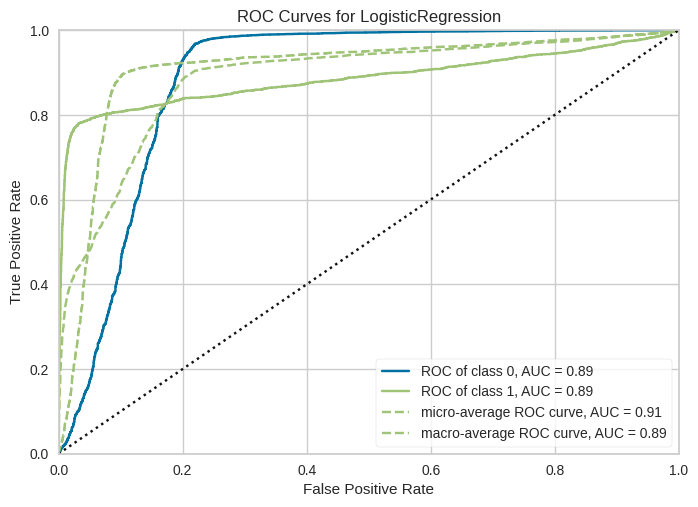

In [40]:
plot_model(tuned_modelo,plot='auc')

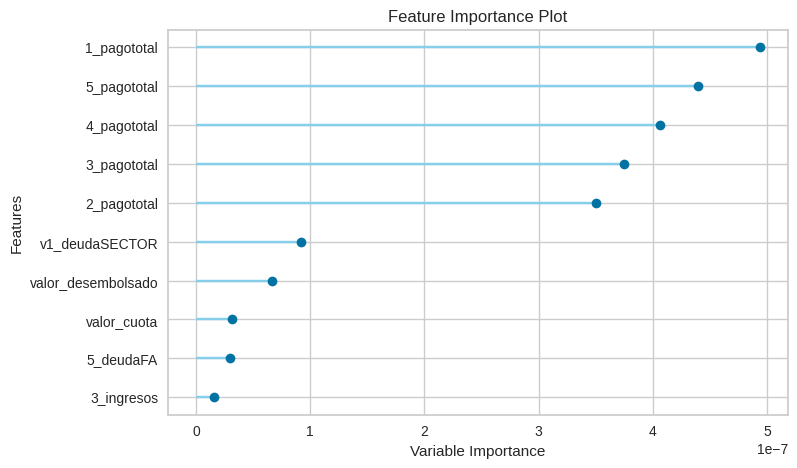

In [41]:
# feature importance
plot_model(tuned_modelo,plot='feature')

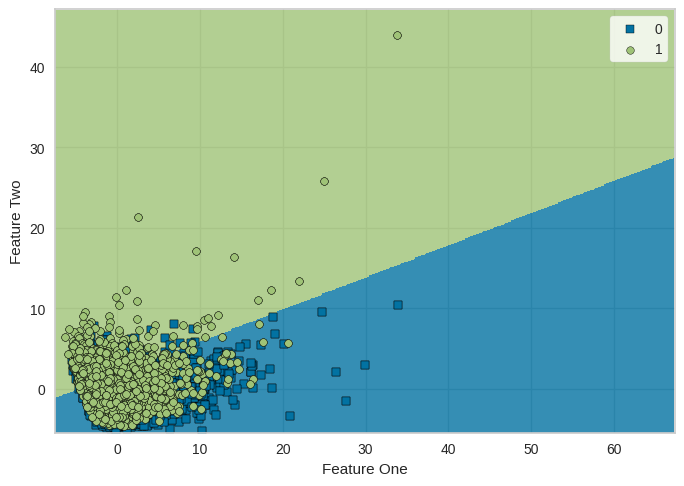

In [45]:

## Decision Boundary
plot_model(tuned_modelo, plot = 'boundary')

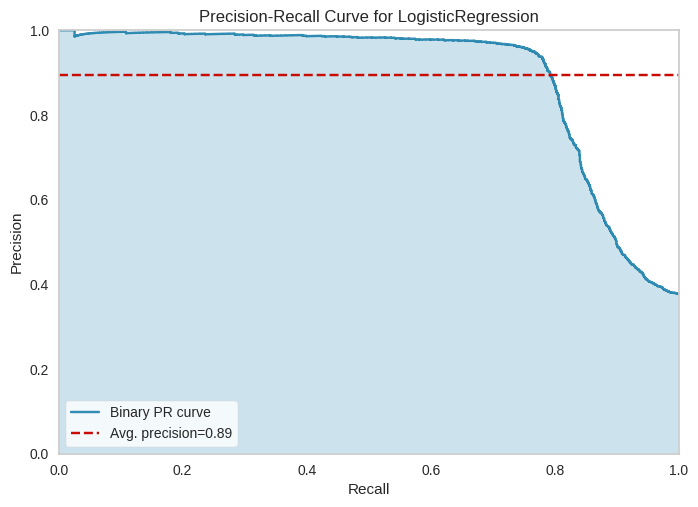

In [46]:

# Precision Recall Curve
plot_model(tuned_modelo, plot = 'pr')

In [47]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)

predicciones.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9043,0.9106,0.8242,0.9346,0.8760,0.7985,0.8027


,obligacion,valor_desembolsado,valor_cuota,cuotas_restantes,DIPLAZO,DIMARCA,DITIPO,DIMODEL,Tasa,Departamento,...,negativo_ingresos,positivo_ingresos,neutro_ingresos,RangoEdad,amortizado,estadocivil,Genero,prepago,prediction_label,prediction_score
0,1330085357,46990000,1586041,48,72,HYUNDAI,AUTOMOVIL,2023,0.018898,RISARALDA,...,1,1,2,29-35,15.935961,CASADO,Femenino,0,0,0.6703
1,1330086230,13400000,615783,37,60,CHEVROLET,AUTOMOVIL,2009,0.019298,RISARALDA,...,2,2,0,29-35,21.180246,SOLTERO,Masculino,1,1,0.5204
2,1150986643,54990000,1763372,26,60,PEUGEOT,CAMIONETA,2022,0.017724,CUNDINAMARCA,...,1,2,1,29-35,14.258739,UNION LIBRE,Femenino,0,0,0.7671
3,1151233170,41000000,1276011,36,60,MAZDA,AUTOMOVIL,2013,0.019298,BOGOTA,...,0,0,4,36-45,20.831707,CASADO,Femenino,1,1,0.6062
4,1151559005,46690000,1651264,50,60,KIA,AUTOMOVIL,2024,0.018898,BOGOTA,...,0,1,3,29-35,6.783697,CASADO,Masculino,0,0,0.9251


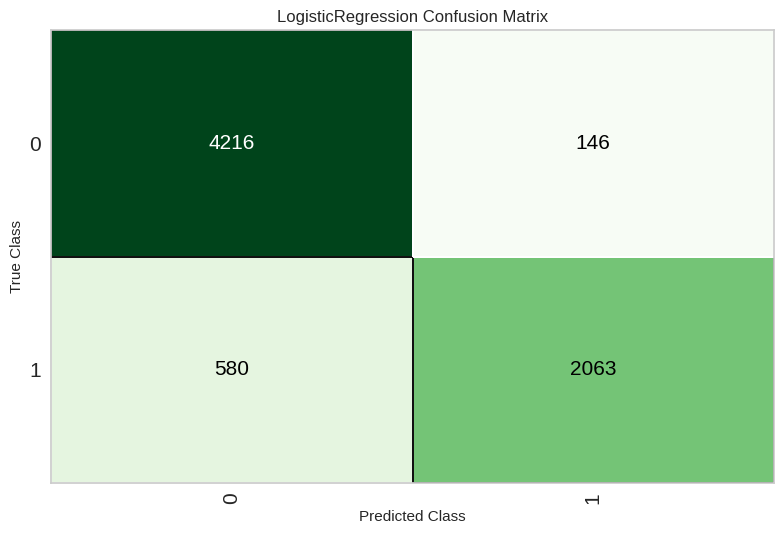

In [48]:
plot_model(tuned_modelo,'confusion_matrix')

In [49]:
# modelo final entrenado con todo el conjunto de datos
final_modelo=finalize_model(tuned_modelo)

In [50]:
print(final_modelo)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['valor_desembolsado',
                                             'valor_cuota', 'cuotas_restantes',
                                             'DIPLAZO', 'Tasa', '1_Acierta',
                                             '2_Acierta', '3_Acierta',
                                             '4_Acierta', '5_Acierta',
                                             '1_deudaFA', '2_deudaFA',
                                             '3_deudaFA', '4_deudaFA',
                                             '5_deudaFA', '1_deudaSECTOR',
                                             '2_deudaSECTOR', '3_deudaSECTOR',
                                             '4_d...
                                                              hierarchy=None,
                                                              min_samples_leaf=2

In [51]:
from google.colab import drive
from pycaret.classification import save_model

# Monta Google Drive
drive.mount('/content/drive')

# Guarda el modelo en la carpeta de Google Drive
modelo_a_guardar = final_modelo  # Reemplaza 'final_modelo' con tu modelo
nombre_del_modelo = 'ModeloPrepagoVehiculo'  # Nombre del modelo
ruta_carpeta_drive = '/content/drive/My Drive/Modelos_FA'  # Ruta de la carpeta en Google Drive

# Guarda el modelo
save_model(modelo_a_guardar, f'{ruta_carpeta_drive}/{nombre_del_modelo}')

# Muestra un mensaje de confirmación
print("El modelo se guardó en Google Drive.")


Mounted at /content/drive
Transformation Pipeline and Model Successfully Saved
El modelo se guardó en Google Drive.
